In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/diabetes.csv")
df = df.drop(["Unnamed: 0"], axis = 1)
df

,Diabetes_binary,HighBP,High Cholesterol,Cholesterol Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical Activity,Fruits,...,Any Health Care,No Doctor because of Cost,General Health,Mental Health,Physical Health,Difficulty Walking,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,Medium,5.0,30.0,0.0,male,4.0,Cat6,Cat8
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,Medium,0.0,0.0,0.0,male,12.0,Cat6,Cat8
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,High,0.0,10.0,0.0,male,13.0,Cat6,Cat8
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Medium,0.0,3.0,0.0,male,11.0,Cat6,Cat8
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Good,0.0,0.0,0.0,female,8.0,Cat5,Cat8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.0,0.0,0.0,female,6.0,Cat4,Cat1
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Good,0.0,0.0,1.0,male,10.0,Cat3,Cat6
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Very Low,15.0,0.0,1.0,female,13.0,Cat6,Cat4
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.0,0.0,1.0,female,11.0,Cat2,Cat4


# 1 preprocessing

## 1.1 Remove Nan values

In [ ]:
columns_name = list(df.columns)
def unique_col_values_printer():
  for column in columns_name:
    print("{} --> [{} values] --> {}".format(column, len(df[column].unique()), df[column].unique()) )
unique_col_values_printer()

Diabetes_binary --> [2 values] --> [0. 1.]
HighBP --> [2 values] --> [1. 0.]
High Cholesterol --> [2 values] --> [0. 1.]
Cholesterol Check --> [2 values] --> [1. 0.]
BMI --> [81 values] --> [26. 28. 29. 18. 31. 32. 27. 24. 21. 58. 30. 20. 22. 38. 40. 25. 36. 47.
 19. 37. 41. 23. 34. 35. 42. 17. 33. 44. 15. 52. 69. 56. 45. 39. 92. 53.
 98. 50. 46. 79. 48. 16. 63. 72. 54. 49. 68. 43. 84. 73. 76. 55. 51. 75.
 57. 60. 12. 77. 82. 67. 71. 61. 14. 81. 59. 86. 13. 87. 65. 95. 89. 62.
 64. 66. 85. 70. 83. nan 80. 78. 74.]
Smoker --> [2 values] --> [0. 1.]
Stroke --> [2 values] --> [0. 1.]
HeartDiseaseorAttack --> [3 values] --> [ 0.  1. nan]
Physical Activity --> [3 values] --> [ 1.  0. nan]
Fruits --> [3 values] --> [ 0.  1. nan]
Veggies --> [3 values] --> [ 1.  0. nan]
Heavy Alcohol Consumption --> [3 values] --> [ 0.  1. nan]
Any Health Care --> [3 values] --> [ 1.  0. nan]
No Doctor because of Cost --> [3 values] --> [ 0.  1. nan]
General Health --> [6 values] --> ['Medium' 'High' 'Good' '

In [ ]:
df.isna().sum()

Diabetes_binary              0
HighBP                       0
High Cholesterol             0
Cholesterol Check            0
BMI                          1
Smoker                       0
Stroke                       0
HeartDiseaseorAttack         1
Physical Activity            1
Fruits                       2
Veggies                      1
Heavy Alcohol Consumption    1
Any Health Care              2
No Doctor because of Cost    2
General Health               1
Mental Health                1
Physical Health              1
Difficulty Walking           2
Sex                          1
Age                          1
Education                    1
Income                       1
dtype: int64

In [ ]:
df = df[df['Income'] != 'Unknown']


<div>
<font color = "Blue">
As can be seen, the number of rows containing nan value is minimal compared to the total data points. In this situation, for cases such as MBI and AGE, which are numerical and continuous values, we can use the method of substituting the median or average. But, removing these data points is preferred based on small amounts.
Among the values available for the data, except nan, we have only one item for income, the value of which is unusual and equal to UnKnown; we also remove this row.

</div>



In [ ]:
df = df.dropna(axis=0)
df.isna().sum()
unique_col_values_printer()

Diabetes_binary --> [2 values] --> [0. 1.]
HighBP --> [2 values] --> [1. 0.]
High Cholesterol --> [2 values] --> [0. 1.]
Cholesterol Check --> [2 values] --> [1. 0.]
BMI --> [80 values] --> [26. 28. 29. 18. 31. 32. 27. 24. 21. 58. 30. 20. 22. 38. 40. 25. 36. 47.
 19. 37. 41. 23. 34. 35. 42. 17. 33. 44. 15. 52. 69. 56. 45. 39. 92. 53.
 98. 50. 46. 79. 48. 16. 63. 72. 54. 49. 68. 43. 84. 73. 76. 55. 51. 75.
 57. 60. 12. 77. 82. 67. 71. 61. 14. 81. 59. 86. 13. 87. 65. 95. 89. 62.
 64. 66. 85. 70. 83. 80. 78. 74.]
Smoker --> [2 values] --> [0. 1.]
Stroke --> [2 values] --> [0. 1.]
HeartDiseaseorAttack --> [2 values] --> [0. 1.]
Physical Activity --> [2 values] --> [1. 0.]
Fruits --> [2 values] --> [0. 1.]
Veggies --> [2 values] --> [1. 0.]
Heavy Alcohol Consumption --> [2 values] --> [0. 1.]
Any Health Care --> [2 values] --> [1. 0.]
No Doctor because of Cost --> [2 values] --> [0. 1.]
General Health --> [5 values] --> ['Medium' 'High' 'Good' 'Low' 'Very Low']
Mental Health --> [31 values]

## 1.2 Remove white space

only columns should be renamed there is no white space in data points values

In [ ]:
df.columns = [column.replace(" ", "_") for column in columns_name]
df.columns


Index(['Diabetes_binary', 'HighBP', 'High_Cholesterol', 'Cholesterol_Check',
       'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'Physical_Activity',
       'Fruits', 'Veggies', 'Heavy_Alcohol_Consumption', 'Any_Health_Care',
       'No_Doctor_because_of_Cost', 'General_Health', 'Mental_Health',
       'Physical_Health', 'Difficulty_Walking', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

## 1.3 Normalize data

<div>
<font color = "Blue">
we know we can divide people body shapes based on BMI. so we divided all the values into four categories

In [ ]:
bins = pd.IntervalIndex.from_tuples([(0, 16), (16, 30), (30, 45), (45, np.inf)], closed='left')
cats = [1, 2, 3, 4]
df['BMI'] = np.array(cats)[pd.cut(df["BMI"], bins = bins).cat.codes].astype('float')



<div>
<font color = "Blue">
Now we should scale  Mental_Health', 'Age', 'Physical_Health' values. <br>
At first, I used the StandardScaler, but I didn't get good result, so I chose the min-max scaling method

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
# scaled_df = df.copy()
# scaler = StandardScaler()
# for col in ['Mental_Health', 'Age', 'Physical_Health']:
#   scaled_df[col] = scaler.fit_transform(df[[col]]).flatten()

scaled_df = df.copy()
for column in ['Age', "Mental_Health", "Physical_Health"]:
# for column in ['Mental_Health', 'Age', 'Physical_Health']:
  scaled_df[column] = (scaled_df[column] - scaled_df[column].min()) / (scaled_df[column].max() - scaled_df[column].min())    


## 1.4 One-Hot Encoding
<div>
<font color = "Blue">
Now we should find categories and replaced them by one Hot encoding_format

In [ ]:
categorical_cols = scaled_df.select_dtypes(include='O').keys()
print(categorical_cols)

Index(['General_Health', 'Sex', 'Education', 'Income'], dtype='object')


In [ ]:
def one_hot_encoder(dataframe):
  for col in categorical_cols:
    labels = df[col].unique().tolist()
    for label in labels:
      dataframe[col+'_'+label] = np.where(dataframe[col]==label,1,0)
    dataframe.drop(col, axis=1, inplace=True)
  return dataframe

In [ ]:
one_hot_encoded_df = one_hot_encoder(scaled_df)
one_hot_encoded_df

,Diabetes_binary,HighBP,High_Cholesterol,Cholesterol_Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical_Activity,Fruits,...,Education_Cat2,Education_Cat1,Income_Cat8,Income_Cat7,Income_Cat6,Income_Cat3,Income_Cat4,Income_Cat1,Income_Cat5,Income_Cat2
0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,0.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,0
2,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,...,0,0,1,0,0,0,0,0,0,0
3,0.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,...,0,0,1,0,0,0,0,0,0,0
4,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
70688,1.0,0.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,0
70689,1.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,...,0,0,0,0,0,0,1,0,0,0
70690,1.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0


In [ ]:
one_hot_encoded_df.select_dtypes(include='O').keys()

Index([], dtype='object')

## 1.5 Train and Test split

In [ ]:
data_dims = one_hot_encoded_df.drop(['Diabetes_binary'], axis=1)
labels = one_hot_encoded_df['Diabetes_binary']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_dims, labels, test_size=0.2, random_state=42, stratify=labels)

# 2 XGBoost classifier model

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import auc
from xgboost import XGBClassifier

## 2.1 Define model

In [ ]:
model = XGBClassifier(
            tree_method='gpu_hist', # We use this parameter to train the model and run gridsearch on GPU, which increases our speed considerably. 
            Learning_rate=0.1,
            Max_depth=4,
            N_estimator=200,
            Subsample=0.5,
            Colsample_bytree=1,
            Random_seed=123,
            Eval_metric='auc',
            Verbosity=1)

## 2.2 Train model

In [ ]:
model.fit(X_train, y_train, 
          eval_set = [(X_train, y_train), (X_test, y_test)], 
          early_stopping_rounds = 10)            

[0]	validation_0-error:0.289665	validation_1-error:0.290939
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0.276827	validation_1-error:0.274103
[2]	validation_0-error:0.29559	validation_1-error:0.295961
[3]	validation_0-error:0.279479	validation_1-error:0.280116
[4]	validation_0-error:0.283564	validation_1-error:0.282875
[5]	validation_0-error:0.28696	validation_1-error:0.286341
[6]	validation_0-error:0.282397	validation_1-error:0.282026
[7]	validation_0-error:0.274988	validation_1-error:0.274316
[8]	validation_0-error:0.276615	validation_1-error:0.276367
[9]	validation_0-error:0.276526	validation_1-error:0.276013
[10]	validation_0-error:0.272459	validation_1-error:0.271203
[11]	validation_0-error:0.269435	validation_1-error:0.26802
[12]	validation_0-error:0.267843	validation_1-error:0.265969
[13]	validation_0-error:0.266818	validation_1-error:0.26554

XGBClassifier(Colsample_bytree=1, Eval_metric='auc', Learning_rate=0.1,
              Max_depth=4, N_estimator=200, Random_seed=123, Subsample=0.5,
              Verbosity=1, tree_method='gpu_hist')

## 2.3 Evaluate mdoel

confusion matrix plotter has imported from [here](https://www.kaggle.com/code/mattkibassa/xgbclassifier-and-confusion-matrix?scriptVersionId=21615450&cellId=20)

In [ ]:
def confusion_matrix_plotter(actual_labels,predicted_labels):
  cm = confusion_matrix(actual_labels, predicted_labels)
  plt.figure(figsize=(5,5))
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
  classNames = ['Negative','Positive']
  plt.title('Matrice de confusion')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)
  s = [['TN','FP'], ['FN', 'TP']]
  
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
  plt.show()

In [ ]:
def evaluator(clf_mdoel, X, actual_labels):
  predicted_labels = clf_mdoel.predict(X)
  precision = precision_score(actual_labels, predicted_labels)
  recall = recall_score(actual_labels, predicted_labels)
  
  print("Precision --> {}\n\n Recall --> {}".format(precision, recall))
  print("\n confusion matrix: ")
  confusion_matrix_plotter(actual_labels,predicted_labels)  

### 2.3.1 Train dataset evaluation

Precision --> 0.7333793420749942

 Recall --> 0.7892763669802646

 confusion matrix: 


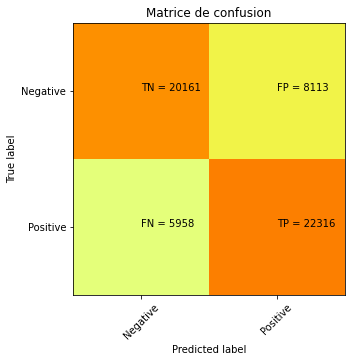

In [ ]:
evaluator(model, X_train, y_train)

### 2.3.2 Test dataset evaluation

Precision --> 0.7365994995390491

 Recall --> 0.791201018531617

 confusion matrix: 


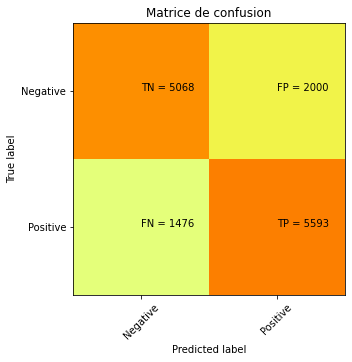

In [ ]:
evaluator(model, X_test, y_test)

# 3- Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import KFold, cross_val_score,  StratifiedKFold, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [ ]:
hyper_param_dict = {
"learning_rate_list" : [0.02, 0.05, 0.1, 0.3],
"max_depth_list" : [2, 3, 4] ,
"n_estimators_list" : [100, 200, 300],
"colsample_bytree" : [0.8, 1]
}
def my_roc_auc_score(model, X, y): return roc_auc_score(y, model.predict_proba(X)[:,1])

## 3.1 Tunner function 

<font color="Blue">
GridSearchCV: get Classifier model, list of diffrent hyper-parameters, definded scoring function.<br>
we want use all processors so set n_jobs = -1, and use defined Kfold for cross validation

In [ ]:
def tunner(hyper_params, X_train, actual_labels, my_roc_auc_score ):
  untuned_model = XGBClassifier(eval_metric='auc', Subsample=0.5) 
  kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
  grid_search = GridSearchCV(model,hyper_params,scoring= my_roc_auc_score, n_jobs=-1, cv=kfold)
  grid_result = grid_search.fit(X_train, actual_labels)
  return grid_result

In [ ]:
grid_result = tunner(hyper_param_dict, X_train, y_train, my_roc_auc_score)

#### Best parameters

In [ ]:
best_hyper_parameters = grid_result.best_params_
best_hyper_parameters

{'colsample_bytree': 0.8,
 'learning_rate_list': 0.02,
 'max_depth_list': 2,
 'n_estimators_list': 100}

<font color="Blue">
After finding the best parameters, we define a model by these parameters and train it.

In [ ]:
best_hyper_parameters = grid_result.best_params_
tuned_model = XGBClassifier(
                    **best_hyper_parameters,
                    Random_seed=123,
                    eval_metric='auc',
                    Subsample=0.5,
                    Verbosity=1
                    ) 

In [ ]:
tuned_model.fit(X_train, y_train,
                eval_set = [(X_train, y_train), (X_test, y_test)], 
                early_stopping_rounds = 10)  

[0]	validation_0-auc:0.760342	validation_1-auc:0.758962
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.775584	validation_1-auc:0.774781
[2]	validation_0-auc:0.784815	validation_1-auc:0.783644
[3]	validation_0-auc:0.792351	validation_1-auc:0.791464
[4]	validation_0-auc:0.798606	validation_1-auc:0.799357
[5]	validation_0-auc:0.800213	validation_1-auc:0.800395
[6]	validation_0-auc:0.800177	validation_1-auc:0.800728
[7]	validation_0-auc:0.802123	validation_1-auc:0.803117
[8]	validation_0-auc:0.805201	validation_1-auc:0.80614
[9]	validation_0-auc:0.805388	validation_1-auc:0.806099
[10]	validation_0-auc:0.806136	validation_1-auc:0.806973
[11]	validation_0-auc:0.808095	validation_1-auc:0.809081
[12]	validation_0-auc:0.809724	validation_1-auc:0.811215
[13]	validation_0-auc:0.811048	validation_1-auc:0.812282
[14]	validation_0-auc:0.811709	validation_1-auc:0.813042

XGBClassifier(Random_seed=123, Subsample=0.5, Verbosity=1, colsample_bytree=0.8,
              eval_metric='auc', learning_rate_list=0.02, max_depth_list=2,
              n_estimators_list=100)

## 3.2 Train dataset evaluation 


Precision --> 0.7334517115517412

 Recall --> 0.7888873169696541

 confusion matrix: 


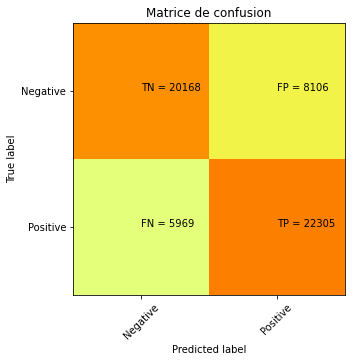

In [ ]:
evaluator(tuned_model, X_train, y_train)

## Test dataset evaluation 

Precision --> 0.7344551071381622

 Recall --> 0.7903522421841844

 confusion matrix: 


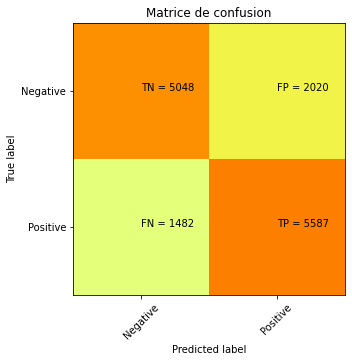

In [ ]:
evaluator(tuned_model, X_test, y_test)

# 4 Plot diagrams

In [ ]:
learning_rate_list = [0.02, 0.05, 0.1, 0.3]
max_depth_list = [2, 3, 4] 
n_estimators_list = [100, 200, 300] 
colsample_bytree = [0.8, 1]

In [ ]:
best_hyper_parameters

{'colsample_bytree': 0.8,
 'learning_rate_list': 0.02,
 'max_depth_list': 2,
 'n_estimators_list': 100}

<font color="Blue">
Below function extract all mean scores calculated by gridsearch, which have the same parameters except the variable parameter. 

In [ ]:
def score_extractor(grid_means_score, grid_result_param, variable_parameter ):
  parameter_score_result = {}
  for i,param_set in enumerate(grid_result_param):
    flag = 0
    for key in param_set.keys():
      if key != variable_parameter:
        if param_set[key] == best_hyper_parameters[key]:
          flag += 1
    if flag == 3:
      parameter_score_result[param_set[variable_parameter]] = grid_means_score[i]
  return parameter_score_result

In [ ]:

def plotter(parameter_score_result,variable_parametet, best_param, fig, i):
  fig.add_subplot(2, 2, i)
  plt.plot(list(parameter_score_result.keys()),list(parameter_score_result.values()), label = variable_parameter)
  key_list = ["{} = {}".format(key, str(value)) for key, value in best_param.items() if key != variable_parameter]
  title = "  ||  ".join(key_list)
  plt.title(title)
  plt.xlabel(variable_parameter)
  plt.ylabel("mean_auc")
  plt.grid()
  plt.legend()

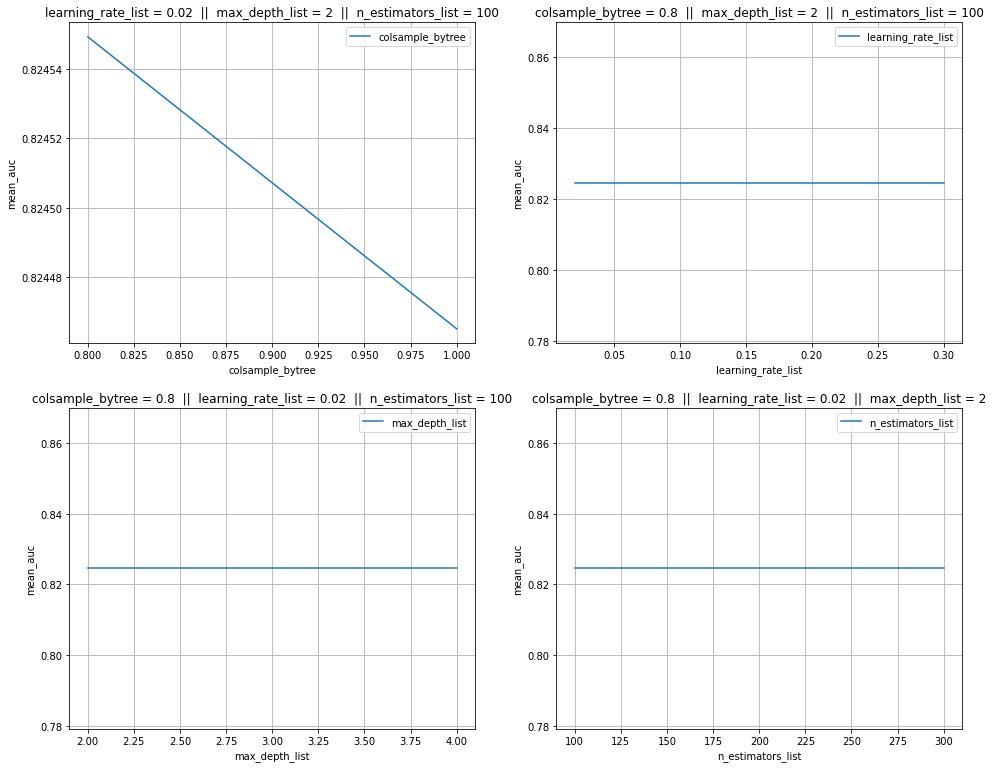

In [ ]:
grid_means_score = grid_result.cv_results_['mean_test_score']
grid_result_param = grid_result.cv_results_['params']
fig = plt.figure(figsize=(16, 13))
i = 1
for variable_parameter in best_hyper_parameters.keys():
  parameter_score_result =  score_extractor(grid_means_score, grid_result_param, variable_parameter)
  plotter(parameter_score_result, variable_parameter, best_hyper_parameters, fig, i)
  i += 1

# Conclusion  


<font color="Blue"> 
As seen in the figures above, we used best_param values for each subplot and placed only one variable on the horizontal axis to see the effects of that variable on the best_param model. Based on the results, it was found that the colsample_bytree parameter has a more significant impact on the quality and performance of the model than other parameters. 
